# Twitter Election Word Cloud

### import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

### reading data

In [2]:
df = pd.read_csv("/kaggle/input/twitter-sentiment/Sentiment.csv")
df.head(3)
data = df[["text", "sentiment"]]

### splitting data

In [3]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

### word cloud

In [4]:
train_pos = train[train['sentiment'] == 'Positive']["text"]
train_neg = train[train['sentiment'] == 'Negative']["text"]

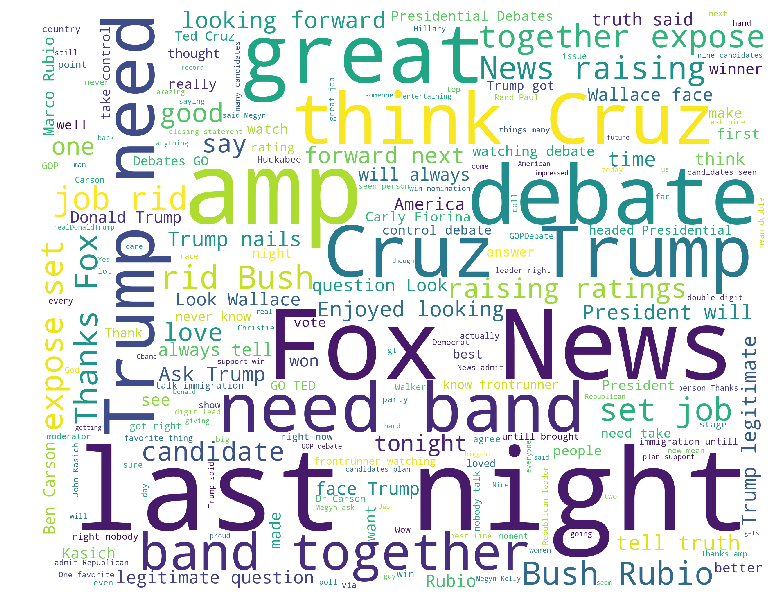

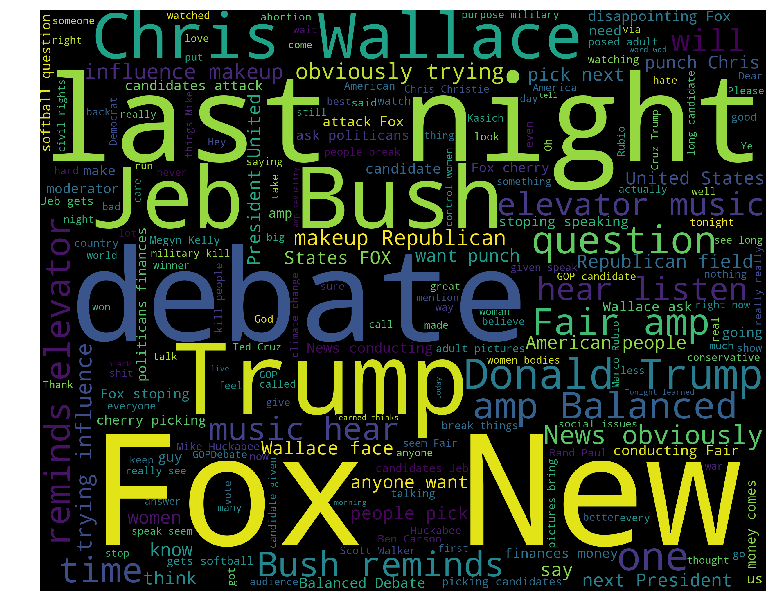

In [5]:
def wordcloud(data, color='black'):
    words = ' '.join(data)
    cleaned_word = " ".join([
        word for word in words.split()
        if 'http' not in word
        and not word.startswith("@")
        and not word.startswith("#")
        and word != "RT"
    ])
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color=color,
                         width=2500,
                         height=2000).generate(cleaned_word)
    plt.figure(1,figsize=(13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
wordcloud(train_pos, 'white')
wordcloud(train_neg)

### removing the stopwords

In [6]:
tweets = []
stop_list = set(stopwords.words("english"))
for index, row in train.iterrows():
    words_lowered = [w.lower() for w in row.text.split() if len(w) >= 3]
    word_cleaned = [
        word for word in words_lowered
        if 'http' not in word
        and not word.startswith("@")
        and not word.startswith("#")
        and word != "RT"
    ]
    words_stop = [word for word in word_cleaned if word not in stop_list]
    tweets.append((words_stop, row.sentiment))
    

test_pos = test[test['sentiment'] == 'Positive']["text"]
test_neg = test[test['sentiment'] == 'Negative']["text"]

### getting word frequency distribution

In [7]:
def get_words_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features

word_features = get_word_features(get_words_tweets(tweets))

def extract_features(document):
    doc_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in doc_words)
        
    return features

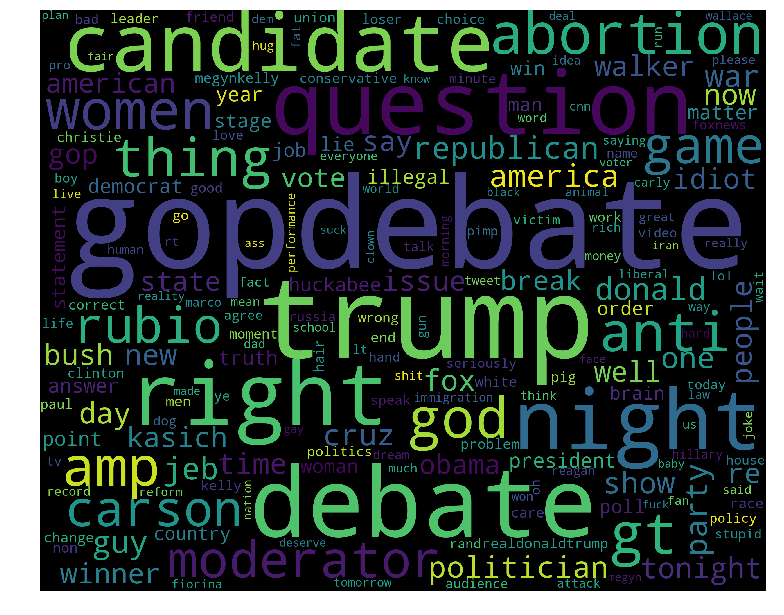

In [8]:
wordcloud(word_features)

### naive bayes classifer

In [9]:
training_set = nltk.classify.apply_features(extract_features, tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)